In [1]:
import librosa
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment

In [45]:
audio = AudioSegment.from_file(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\fenHongSeDeHuiYi\1_010.mp3")

In [46]:
segment = audio[110000 : 175845]

In [47]:
segment.export(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\songdemo_seg_test.wav", format="wav")

<_io.BufferedRandom name='D:\\my_knowledge\\research_assistant\\python_project\\speech_recognition\\audio\\songdemo_seg_test.wav'>

In [17]:
y, sr = librosa.load(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\songdemo_seg_test.wav")

In [25]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
bounds = librosa.segment.agglomerative(chroma, 4)
bound_times = librosa.frames_to_time(bounds, sr=sr)
bound_times

D:\miniconda3\envs\speech_recognition_new\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=946
  warnings.warn(


array([0.        , 0.60371882, 1.41641723, 2.08979592])

[Text(0.5, 1.0, 'Power spectrogram')]

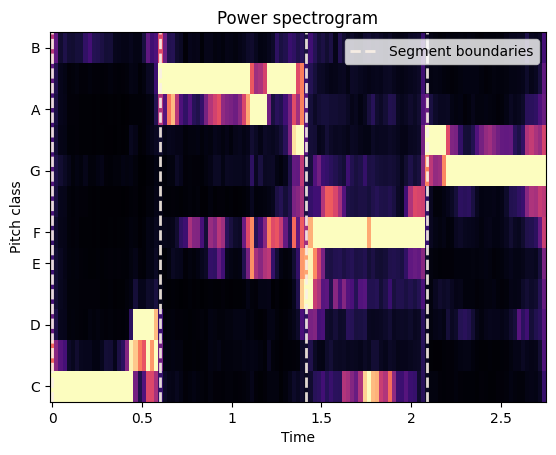

In [26]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt
fig, ax = plt.subplots()
trans = mpt.blended_transform_factory(
            ax.transData, ax.transAxes)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.vlines(bound_times, 0, 1, color='linen', linestyle='--',
          linewidth=2, alpha=0.9, label='Segment boundaries',
          transform=trans)
ax.legend()
ax.set(title='Power spectrogram')